In [203]:
#import data analysis and visualization library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import NPL library
from wordcloud import WordCloud


In [173]:
amazon = pd.read_csv("amazon_reviews.csv")

amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [174]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [175]:
amazon.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [176]:
amazon.isna().value_counts()

rating  date   variation  verified_reviews  feedback
False   False  False      False             False       3150
dtype: int64

In [177]:
amazon['length']= amazon['verified_reviews'].apply(len)

amazon

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [180]:
amazon.groupby('variation').count().sort_values('rating', ascending=False)


,rating,date,verified_reviews,feedback,length
variation,,,,,
Black Dot,516,516,516,516,516
Charcoal Fabric,430,430,430,430,430
Configuration: Fire TV Stick,350,350,350,350,350
Black Plus,270,270,270,270,270
Black Show,265,265,265,265,265
Black,261,261,261,261,261
Black Spot,241,241,241,241,241
White Dot,184,184,184,184,184
Heather Gray Fabric,157,157,157,157,157


In [181]:
pd.crosstab(amazon.variation, amazon.rating)

rating,1,2,3,4,5
variation,,,,,
Black,30,5,15,35,176
Black Dot,22,14,34,84,362
Black Plus,17,11,14,41,187
Black Show,10,8,14,43,190
Black Spot,18,14,11,30,168
Charcoal Fabric,4,8,10,56,352
Configuration: Fire TV Stick,13,15,6,34,282
Heather Gray Fabric,0,2,10,22,123
Oak Finish,0,0,0,2,12


<AxesSubplot:xlabel='variation'>

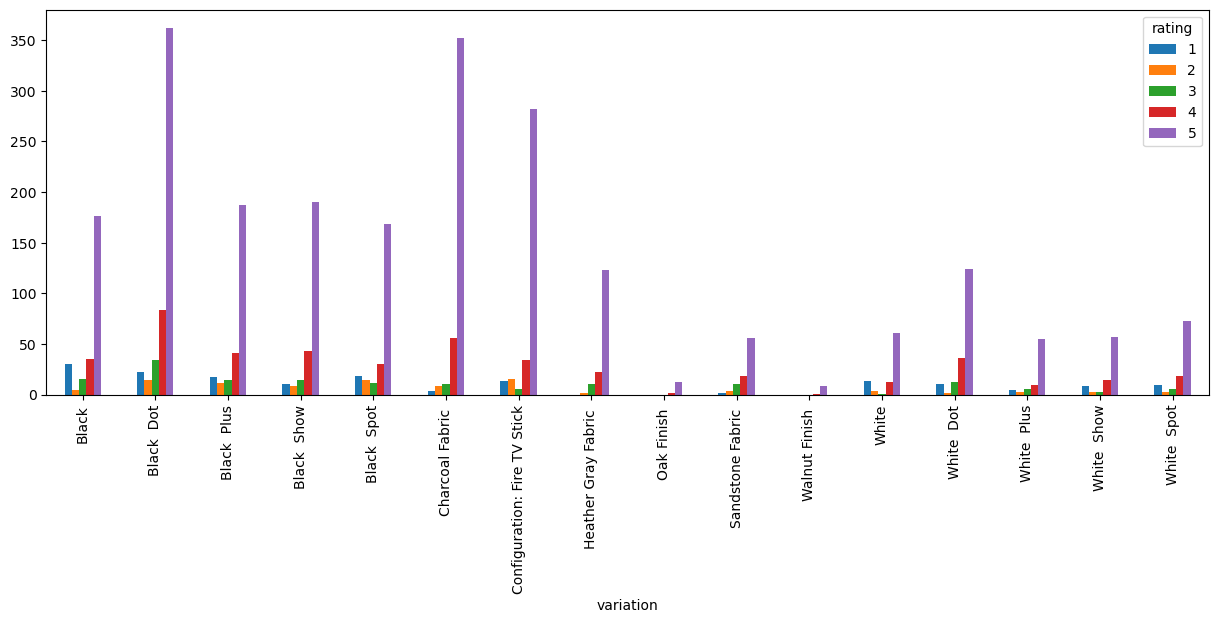

In [191]:
#how are the variations rated
pd.crosstab(amazon.variation, amazon.rating).plot(kind = 'bar', figsize=(15,5))

In [87]:
amazon.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:xlabel='feedback', ylabel='count'>

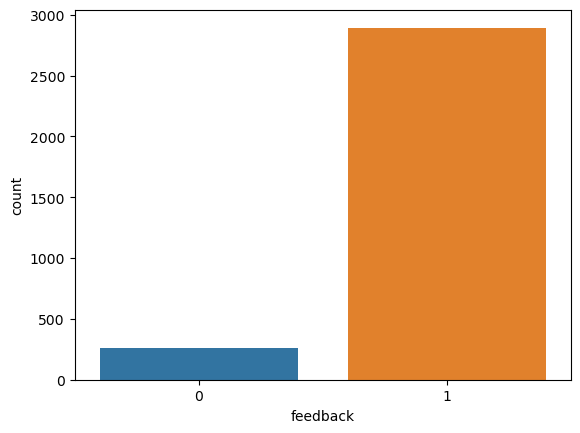

In [74]:
#count of feedbal label

sns.countplot(data = amazon, x= 'feedback')

<AxesSubplot:xlabel='rating', ylabel='count'>

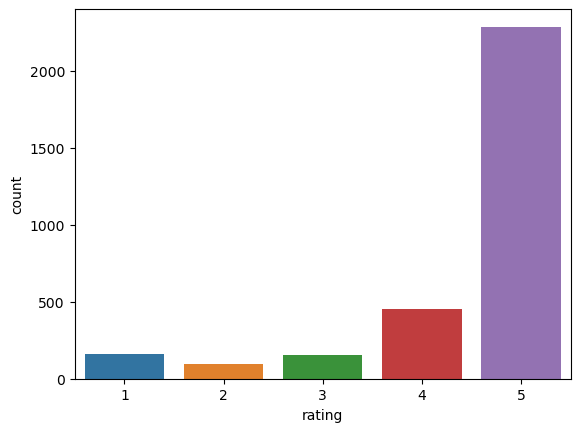

In [89]:
#count of number of star ratings
sns.countplot(data = amazon, x='rating')

In [75]:
# #convert date column to datetime 

# amazon['date'] = pd.to_datetime(amazon['date'])

# #crreate new columns - Year and Month

# amazon['Year']= amazon['date'].dt.year
# amazon['Month']= amazon['date'].dt.month

<AxesSubplot:xlabel='length', ylabel='Count'>

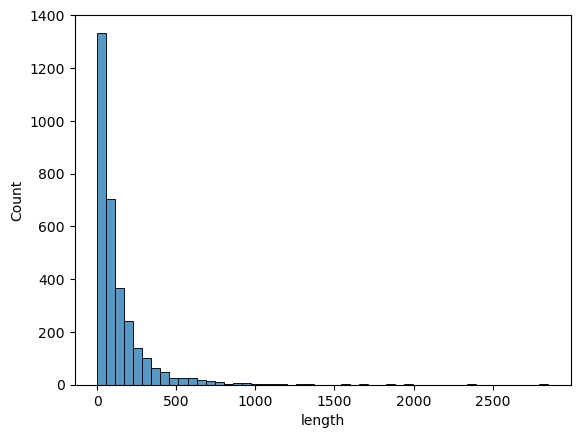

In [94]:
#length of tweet distribution
sns.histplot(data =amazon.length, bins= 50)

In [103]:
#lets see all the reviews with 5 star ratings

five_star = amazon[amazon.rating == 5][['verified_reviews', 'rating']]
five_star

,verified_reviews,rating
0,Love my Echo!,5
1,Loved it!,5
3,I have had a lot of fun with this thing. My 4 ...,5
4,Music,5
5,I received the echo as a gift. I needed anothe...,5
...,...,...
3144,love it,5
3145,"Perfect for kids, adults and everyone in betwe...",5
3146,"Listening to music, searching locations, check...",5
3147,"I do love these things, i have them running my...",5


In [104]:
#lets see all the reviews with 1 star ratings

one_star = amazon[amazon.rating == 1][['verified_reviews', 'rating']]
one_star

,verified_reviews,rating
141,Not much features.,1
162,"Stopped working after 2 weeks ,didn't follow c...",1
341,Alexa hardly came on..,1
350,Item no longer works after just 5 months of us...,1
361,This thing barely works. You have to select 3r...,1
...,...,...
3024,I was really happy with my original echo so i ...,1
3047,Echo Dot responds to us when we aren't even ta...,1
3048,NOT CONNECTED TO MY PHONE PLAYLIST :(,1
3091,I didn’t order it,1


In [105]:
one_star.shape, five_star.shape

((161, 2), (2286, 2))

In [121]:
#convert date column to datetime 

amazon['date'] = pd.to_datetime(amazon['date'])

#create new columns - Year and Month

amazon['Year']= amazon['date'].dt.year
amazon['Month']= amazon['date'].dt.month
amazon['DayofWeek']= amazon['date'].dt.dayofweek

In [129]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Weekend', 'Weekend']
amazon['Weekday'] = amazon.DayofWeek.map(lambda x: day_names[x])

In [130]:
amazon

,rating,date,variation,verified_reviews,feedback,length,Year,Month,Day,DayofWeek,Weekday
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13,2018,7,31,1,Tuesday
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9,2018,7,31,1,Tuesday
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,2018,7,31,1,Tuesday
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,2018,7,31,1,Tuesday
4,5,2018-07-31,Charcoal Fabric,Music,1,5,2018,7,31,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,2018,7,30,0,Monday
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,135,2018,7,30,0,Monday
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,441,2018,7,30,0,Monday
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,380,2018,7,30,0,Monday


<AxesSubplot:xlabel='Weekday'>

<Figure size 1000x1000 with 0 Axes>

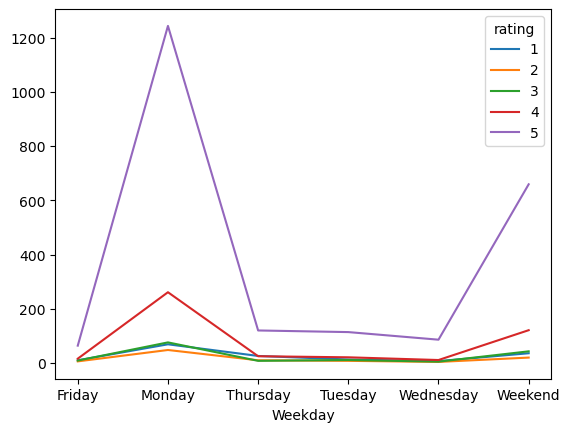

In [160]:
plt.figure(figsize=(10, 10))
pd.crosstab(amazon.Weekday, amazon.rating).plot()

#Mondays have more 5 star ratings and more reviews than weekends

/Users/kossyajuluchukwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekday', ylabel='count'>

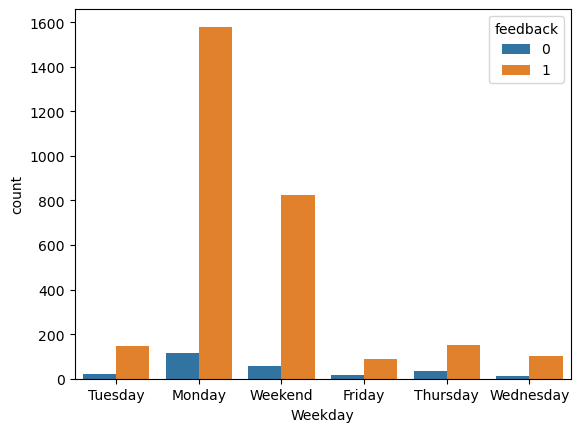

In [162]:

sns.countplot(amazon['Weekday'],data= amazon, hue = 'feedback')

We have move positive impression on Mondays based on the ratings, than every other day.

In [169]:
amazon

,rating,date,variation,verified_reviews,feedback,length,Day,DayofWeek,Weekday
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13,31,1,Tuesday
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9,31,1,Tuesday
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,31,1,Tuesday
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,31,1,Tuesday
4,5,2018-07-31,Charcoal Fabric,Music,1,5,31,1,Tuesday
...,...,...,...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,30,0,Monday
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,135,30,0,Monday
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,441,30,0,Monday
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,380,30,0,Monday


In [171]:
amazon.drop(['Day', 'DayofWeek'], axis= 1)

,rating,date,variation,verified_reviews,feedback,length,Weekday
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13,Tuesday
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9,Tuesday
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,Tuesday
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,Tuesday
4,5,2018-07-31,Charcoal Fabric,Music,1,5,Tuesday
...,...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Monday
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,135,Monday
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,441,Monday
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,380,Monday


In [247]:
#let show a wordcloud visualization of the target label(feedback)
positive = amazon[amazon.feedback == 1][['verified_reviews', 'rating', 'feedback']]
positive

,verified_reviews,rating,feedback
0,Love my Echo!,5,1
1,Loved it!,5,1
2,"Sometimes while playing a game, you can answer...",4,1
3,I have had a lot of fun with this thing. My 4 ...,5,1
4,Music,5,1
...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",5,1
3146,"Listening to music, searching locations, check...",5,1
3147,"I do love these things, i have them running my...",5,1
3148,Only complaint I have is that the sound qualit...,5,1


In [248]:
negative = amazon[amazon.feedback ==0][['verified_reviews', 'rating', 'feedback']]
negative

,verified_reviews,rating,feedback
46,"It's like Siri, in fact, Siri answers more acc...",2,0
111,Sound is terrible if u want good music too get...,2,0
141,Not much features.,1,0
162,"Stopped working after 2 weeks ,didn't follow c...",1,0
176,Sad joke. Worthless.,2,0
...,...,...,...
3047,Echo Dot responds to us when we aren't even ta...,1,0
3048,NOT CONNECTED TO MY PHONE PLAYLIST :(,1,0
3067,The only negative we have on this product is t...,2,0
3091,I didn’t order it,1,0


In [249]:
positive_word = ('').join(positive.verified_reviews.to_list())
positive_word

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

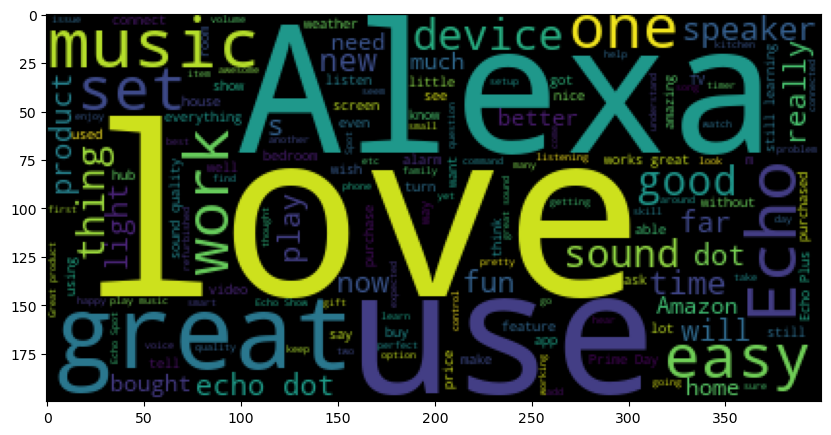

In [250]:
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(positive_word));

In [251]:
negative_word = ('').join(negative.verified_reviews.to_list())
negative_word

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals.Sound is terrible if u want good music too get a boseNot much features.Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working?Sad joke. Worthless.Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes thingsI am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She randomly

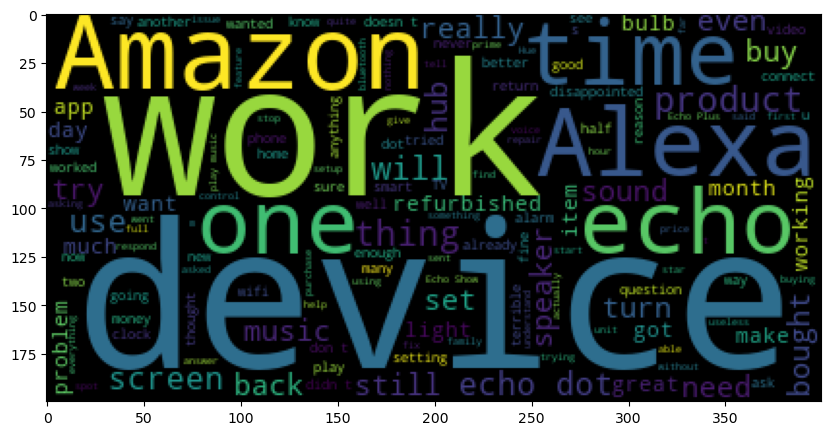

In [252]:
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(negative_word));

In [206]:
import nltk #import Natural language toolkit

nltk.download('stopwords')

#list out all the stop word in english language
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kossyajuluchukwu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [205]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [253]:
# create a function to remove punctuations and stopwords

def remove_word(message):
    remove_sign = [char for char in message if char not in string.punctuation]
    no_sign =('').join(remove_sign)
    old_word = [i for i in no_sign.split() if i.lower() not in stopwords.words('english')]
    new_word = (' ').join(old_word)
    return new_word

In [254]:
remove_word(amazon.verified_reviews[3])

'lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well'

In [264]:
#tokenize the text using countvectorizer 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer= remove_word, dtype=np.int8)

new_vector = vectorizer.fit_transform(amazon.verified_reviews)

print(new_vector.toarray())

[[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [16  0  0 ...  0  0  0]
 ...
 [41  0  0 ...  0  0  0]
 [36  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [256]:
X = pd.DataFrame(new_vector.toarray())

X

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
y= amazon.feedback

In [277]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

/Users/kossyajuluchukwu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

              precision    recall  f1-score   support

           0       0.25      0.05      0.09        58
           1       0.91      0.98      0.95       572

    accuracy                           0.90       630
   macro avg       0.58      0.52      0.52       630
weighted avg       0.85      0.90      0.87       630



/Users/kossyajuluchukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kossyajuluchukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


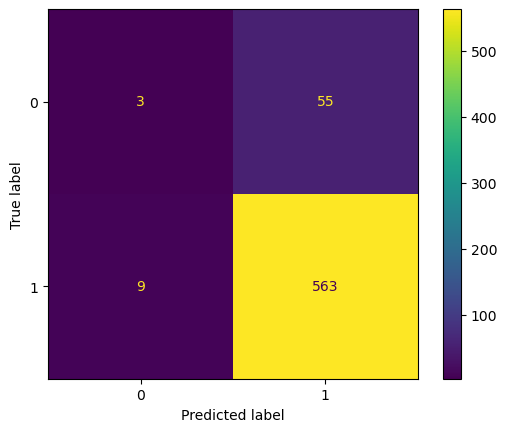

In [274]:
log =LogisticRegression()
log.fit(X_train, y_train)
predict = log.predict(X_test)
print(classification_report(y_test, predict))
plot_confusion_matrix(log,X_test, y_test )

              precision    recall  f1-score   support

           0       0.73      0.14      0.23        58
           1       0.92      0.99      0.96       572

    accuracy                           0.92       630
   macro avg       0.82      0.57      0.59       630
weighted avg       0.90      0.92      0.89       630



/Users/kossyajuluchukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


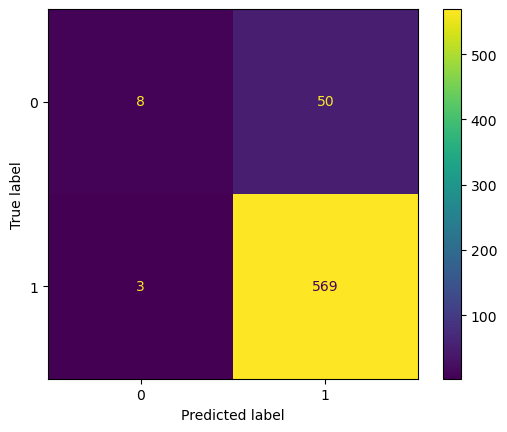

In [276]:
gradient =GradientBoostingClassifier()
gradient.fit(X_train, y_train)
predict = gradient.predict(X_test)
print(classification_report(y_test, predict))
plot_confusion_matrix(gradient,X_test, y_test )

Learning rate set to 0.015287
0:	learn: 0.6764322	total: 65.5ms	remaining: 1m 5s
1:	learn: 0.6607276	total: 66.7ms	remaining: 33.3s
2:	learn: 0.6451399	total: 68ms	remaining: 22.6s
3:	learn: 0.6299065	total: 69.7ms	remaining: 17.4s
4:	learn: 0.6159911	total: 71.9ms	remaining: 14.3s
5:	learn: 0.6026085	total: 73.8ms	remaining: 12.2s
6:	learn: 0.5898815	total: 75.7ms	remaining: 10.7s
7:	learn: 0.5776565	total: 77.4ms	remaining: 9.59s
8:	learn: 0.5656579	total: 78.8ms	remaining: 8.67s
9:	learn: 0.5540926	total: 80.1ms	remaining: 7.93s
10:	learn: 0.5426570	total: 81.8ms	remaining: 7.35s
11:	learn: 0.5322863	total: 83.3ms	remaining: 6.86s
12:	learn: 0.5222405	total: 84.7ms	remaining: 6.43s
13:	learn: 0.5127467	total: 86.1ms	remaining: 6.06s
14:	learn: 0.5038134	total: 87.5ms	remaining: 5.74s
15:	learn: 0.4950510	total: 88.9ms	remaining: 5.47s
16:	learn: 0.4861036	total: 90.5ms	remaining: 5.24s
17:	learn: 0.4778796	total: 91.9ms	remaining: 5.01s
18:	learn: 0.4697492	total: 93.5ms	remaining: 

217:	learn: 0.2131718	total: 390ms	remaining: 1.4s
218:	learn: 0.2130031	total: 392ms	remaining: 1.4s
219:	learn: 0.2126857	total: 393ms	remaining: 1.39s
220:	learn: 0.2126409	total: 394ms	remaining: 1.39s
221:	learn: 0.2124605	total: 396ms	remaining: 1.39s
222:	learn: 0.2123015	total: 397ms	remaining: 1.39s
223:	learn: 0.2121742	total: 399ms	remaining: 1.38s
224:	learn: 0.2119005	total: 400ms	remaining: 1.38s
225:	learn: 0.2117368	total: 402ms	remaining: 1.38s
226:	learn: 0.2115790	total: 403ms	remaining: 1.37s
227:	learn: 0.2111272	total: 405ms	remaining: 1.37s
228:	learn: 0.2109720	total: 406ms	remaining: 1.37s
229:	learn: 0.2108902	total: 407ms	remaining: 1.36s
230:	learn: 0.2104182	total: 409ms	remaining: 1.36s
231:	learn: 0.2100444	total: 411ms	remaining: 1.36s
232:	learn: 0.2097550	total: 412ms	remaining: 1.36s
233:	learn: 0.2094516	total: 414ms	remaining: 1.35s
234:	learn: 0.2092598	total: 415ms	remaining: 1.35s
235:	learn: 0.2091540	total: 416ms	remaining: 1.35s
236:	learn: 0.

484:	learn: 0.1630283	total: 783ms	remaining: 831ms
485:	learn: 0.1628014	total: 785ms	remaining: 830ms
486:	learn: 0.1625256	total: 786ms	remaining: 828ms
487:	learn: 0.1622730	total: 787ms	remaining: 826ms
488:	learn: 0.1619752	total: 789ms	remaining: 824ms
489:	learn: 0.1618291	total: 790ms	remaining: 822ms
490:	learn: 0.1615593	total: 792ms	remaining: 821ms
491:	learn: 0.1613442	total: 793ms	remaining: 819ms
492:	learn: 0.1610570	total: 794ms	remaining: 817ms
493:	learn: 0.1608688	total: 796ms	remaining: 815ms
494:	learn: 0.1606069	total: 797ms	remaining: 814ms
495:	learn: 0.1604532	total: 799ms	remaining: 812ms
496:	learn: 0.1603615	total: 801ms	remaining: 811ms
497:	learn: 0.1601917	total: 802ms	remaining: 809ms
498:	learn: 0.1600201	total: 804ms	remaining: 807ms
499:	learn: 0.1598377	total: 806ms	remaining: 806ms
500:	learn: 0.1596072	total: 807ms	remaining: 804ms
501:	learn: 0.1593645	total: 808ms	remaining: 802ms
502:	learn: 0.1592442	total: 810ms	remaining: 800ms
503:	learn: 

738:	learn: 0.1193629	total: 1.18s	remaining: 416ms
739:	learn: 0.1192405	total: 1.18s	remaining: 414ms
740:	learn: 0.1189838	total: 1.18s	remaining: 412ms
741:	learn: 0.1188285	total: 1.18s	remaining: 411ms
742:	learn: 0.1186740	total: 1.18s	remaining: 409ms
743:	learn: 0.1184726	total: 1.19s	remaining: 408ms
744:	learn: 0.1184136	total: 1.19s	remaining: 406ms
745:	learn: 0.1182782	total: 1.19s	remaining: 405ms
746:	learn: 0.1182118	total: 1.19s	remaining: 403ms
747:	learn: 0.1181164	total: 1.19s	remaining: 401ms
748:	learn: 0.1179517	total: 1.19s	remaining: 400ms
749:	learn: 0.1177338	total: 1.19s	remaining: 398ms
750:	learn: 0.1175131	total: 1.2s	remaining: 397ms
751:	learn: 0.1173815	total: 1.2s	remaining: 395ms
752:	learn: 0.1172075	total: 1.2s	remaining: 393ms
753:	learn: 0.1170596	total: 1.2s	remaining: 392ms
754:	learn: 0.1168396	total: 1.2s	remaining: 390ms
755:	learn: 0.1167085	total: 1.2s	remaining: 388ms
756:	learn: 0.1165571	total: 1.21s	remaining: 387ms
757:	learn: 0.1163

990:	learn: 0.0924145	total: 1.57s	remaining: 14.2ms
991:	learn: 0.0922712	total: 1.57s	remaining: 12.7ms
992:	learn: 0.0922600	total: 1.57s	remaining: 11.1ms
993:	learn: 0.0920959	total: 1.57s	remaining: 9.5ms
994:	learn: 0.0920467	total: 1.57s	remaining: 7.91ms
995:	learn: 0.0919229	total: 1.58s	remaining: 6.33ms
996:	learn: 0.0918543	total: 1.58s	remaining: 4.75ms
997:	learn: 0.0917729	total: 1.58s	remaining: 3.17ms
998:	learn: 0.0917050	total: 1.58s	remaining: 1.58ms
999:	learn: 0.0917023	total: 1.58s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      0.14      0.24        58
           1       0.92      1.00      0.96       572

    accuracy                           0.92       630
   macro avg       0.96      0.57      0.60       630
weighted avg       0.93      0.92      0.89       630



/Users/kossyajuluchukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


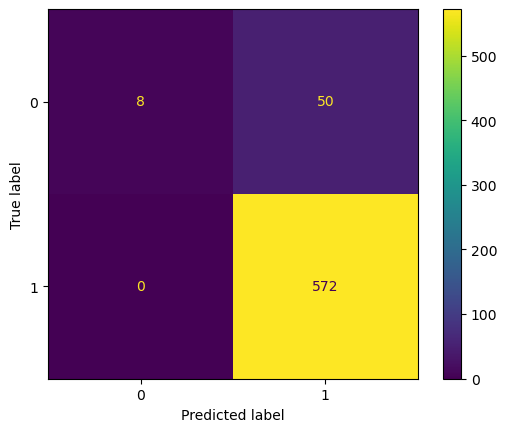

In [278]:
cat =CatBoostClassifier()
cat.fit(X_train, y_train)
predict = cat.predict(X_test)
print(classification_report(y_test, predict))
plot_confusion_matrix(cat,X_test, y_test )

I got better predictive analysis via the catbBoostClassifier model!!